In [64]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# IHEK Kits in EMRO Region

In [106]:
world = gpd.read_file("TM_WORLD_BORDERS-0.3.shp")

emro_countries = ["Afghanistan", "Bahrain", "Djibouti", "Egypt", "Iran (Islamic Republic of)", "Iraq", "Jordan", "Kuwait", "Lebanon", "Libyan Arab Jamahiriya", "Morocco", "Oman", "Pakistan", "Qatar", "Saudi Arabia",
                 "Somalia", "Sudan", "Syrian Arab Republic", "Tunisia", "United Arab Emirates", "Yemen"]
other_c = ["Israel", "Kenya", "Ethiopia", "Algeria", "Sudan", "South Sudan", "Chad", "Central African Replublic"]
emro = world[world["NAME"].isin(emro_countries)]
other = ["Israel", "Kenya", "Ethiopia", "Algeria"]
other = world[world["NAME"].isin(other_c)]
emro.replace({"NAME": {"Iran (Islamic Republic of)":"Iran",
                    "Libyan Arab Jamahiriya": "Libya",
                    "Syrian Arab Republic": "Syria"}}, inplace=True)

/home/gunnar/miniconda3/lib/python3.6/site-packages/pandas/core/generic.py:4550: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [107]:
emro["Current number of kits"] = np.random.randint(300, 2000, len(emro))
emro["Inbound number of kits"] = np.random.randint(20, 200, len(emro))
emro["Need in next 3 months"] = np.random.randint(500, 1000, len(emro))
emro["Need > Supply"] = emro["Need in next 3 months"] > emro["Current number of kits"]
emro["Country"] = emro["NAME"]

/home/gunnar/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/gunnar/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/gunnar/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

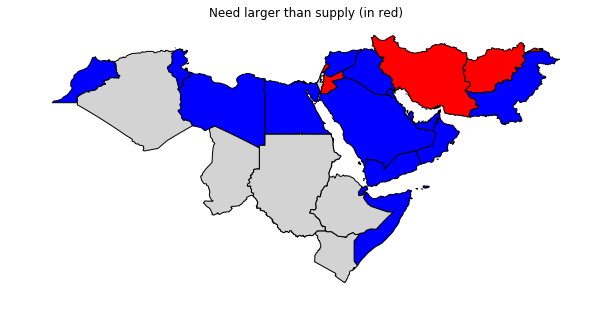

In [108]:
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot()
ax.set_title("Need larger than supply (in red)")
emro[emro["Need > Supply"]].plot(color="red", ax=ax,edgecolor="black")
emro[~emro["Need > Supply"]].plot(color="blue", ax=ax,edgecolor="black")
other.plot(ax=ax, edgecolor="black", color="lightgrey")
plt.axis('off')
pass

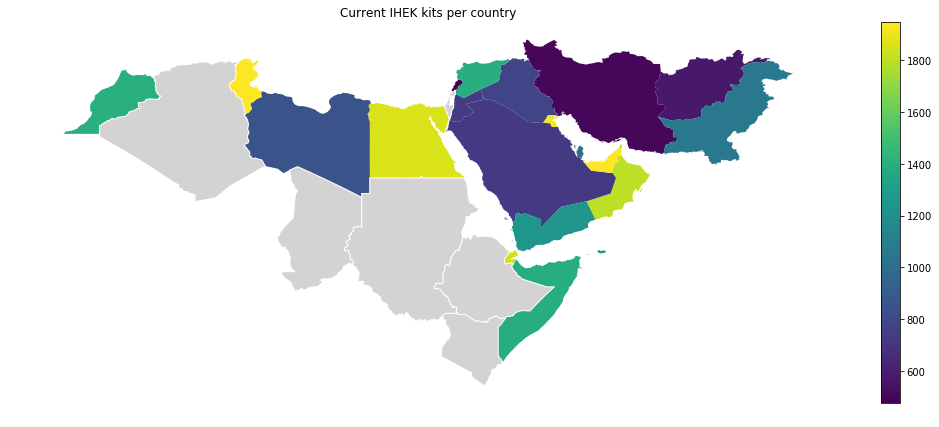

In [111]:
fig = plt.figure(figsize=(18, 7))
ax = plt.subplot()
ax.set_title("Current IHEK kits per country")
emro.plot(column="Current number of kits", legend=True, ax=ax)
other.plot(ax=ax, edgecolor="white", color="lightgrey")
plt.axis('off')
pass

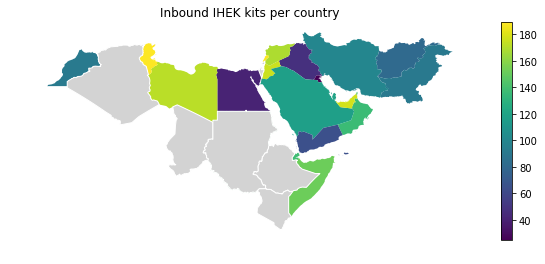

In [112]:
fig = plt.figure(figsize=(10, 4))
ax = plt.subplot()
ax.set_title("Inbound IHEK kits per country")
emro.plot(column="Inbound number of kits", legend=True, ax=ax)
other.plot(ax=ax, edgecolor="white", color="lightgrey")
plt.axis('off')
pass

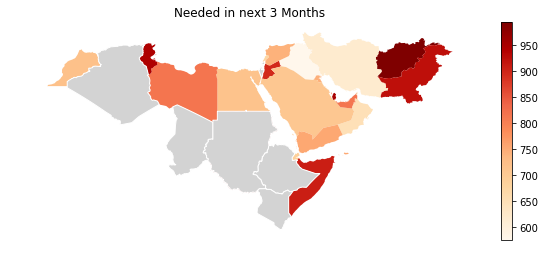

In [113]:
fig = plt.figure(figsize=(10, 4))
ax = plt.subplot()
ax.set_title("Needed in next 3 Months")
emro.plot(column="Need in next 3 months", legend=True, ax=ax, cmap="OrRd")
other.plot(ax=ax, edgecolor="white", color="lightgrey")
plt.axis('off')
pass

In [84]:
emro[["Country", "Current number of kits", "Inbound number of kits", "Need in next 3 months"]].sort_values("Current number of kits", ascending=False).set_index("Country")

,Current number of kits,Inbound number of kits,Need in next 3 months
Country,,,
Jordan,1978,157,640
Kuwait,1967,109,502
Djibouti,1880,58,902
Tunisia,1757,199,855
Yemen,1547,180,554
Morocco,1436,28,664
Qatar,1221,21,969
Libya,1199,198,898
Oman,1172,98,816


In [83]:
emro["Country"]

9                   Bahrain
30              Afghanistan
45                 Djibouti
49                    Egypt
83                     Iran
87                     Iraq
90                   Jordan
96                   Kuwait
99                  Lebanon
106                   Libya
113                 Morocco
117                    Oman
162                Pakistan
168                   Qatar
176            Saudi Arabia
186                 Somalia
189                   Sudan
191                   Syria
200                 Tunisia
221                   Yemen
227    United Arab Emirates
Name: Country, dtype: object